## 문제정의
- 버섯의 특징을 사용해서 식용버섯, 독버섯 분류

### 목표
- Decision Tree 과대 적합 제어/시각화/특성 선택 

## 데이터 수집

In [1]:
import pandas as pd

In [2]:
mushroom = pd.read_csv("./data/mushroom.csv")
mushroom

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
mushroom.shape

(8124, 23)

## 데이터 전처리

### 결측지 확인

In [4]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## 탐색적 데이터 분석

## 모델 선택 및 하이퍼 파라미터 튜닝

### 문제와 정답으로 분리

In [5]:
X = mushroom.loc[:,'cap-shape':]
y = mushroom['poisonous']
X,y

(     cap-shape cap-surface cap-color bruises odor gill-attachment  \
 0            x           s         n       t    p               f   
 1            x           s         y       t    a               f   
 2            b           s         w       t    l               f   
 3            x           y         w       t    p               f   
 4            x           s         g       f    n               f   
 ...        ...         ...       ...     ...  ...             ...   
 8119         k           s         n       f    n               a   
 8120         x           s         n       f    n               a   
 8121         f           s         n       f    n               a   
 8122         k           y         n       f    y               f   
 8123         x           s         n       f    n               a   
 
      gill-spacing gill-size gill-color stalk-shape  ...  \
 0               c         n          k           e  ...   
 1               c         b          

### 인코딩
- 글자 데이터를 수치 데이터로 변환

#### label 인코딩

In [6]:
X1 = X.copy()

In [7]:
X1['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [8]:
X1['cap-shape'].map({'x':1,'b':2,'s':3,'f':4,'k':5,'c':6})

0       1
1       1
2       2
3       1
4       1
       ..
8119    5
8120    1
8121    4
8122    5
8123    1
Name: cap-shape, Length: 8124, dtype: int64

#### One hot 인코딩

In [9]:
X2 = X.copy()

In [10]:
# 원한 인코딩을 수행할 컬럼만 넣어 주어야 함
XOneHot = pd.get_dummies(X2)
XOneHot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [11]:
XOneHot.to_csv("XOneHot.csv")

### 훈련과 평가로 데이터 분리

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
XTrain,XTest,yTrain,yTest = train_test_split(XOneHot,y,test_size=0.3,random_state=6)

In [14]:
XTrain,XTest,yTrain,yTest

(      cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
 716             1            0            0            0            0   
 36              0            0            0            0            1   
 336             0            0            0            0            0   
 8084            1            0            0            0            0   
 960             0            0            0            0            0   
 ...           ...          ...          ...          ...          ...   
 4714            0            0            1            0            0   
 2004            0            0            1            0            0   
 227             0            0            0            0            0   
 2761            0            0            0            0            0   
 7050            0            0            0            1            0   
 
       cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
 716             0          

### 모델 선택

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
treeModel = DecisionTreeClassifier()

### 하이퍼 파라미터 튜닝

## 학습

In [17]:
treeModel.fit(XTrain,yTrain)

DecisionTreeClassifier()

## 평가

In [18]:
treeModel.score(XTrain,yTrain)

1.0

In [19]:
treeModel.score(XTest,yTest)

1.0

## 시각화

In [20]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [21]:
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

In [22]:
from sklearn.tree import export_graphviz
export_graphviz(treeModel, out_file='tree.dot',
               class_names=['p','e'],
               feature_names=XOneHot.columns,
               impurity=True,
               filled=True)

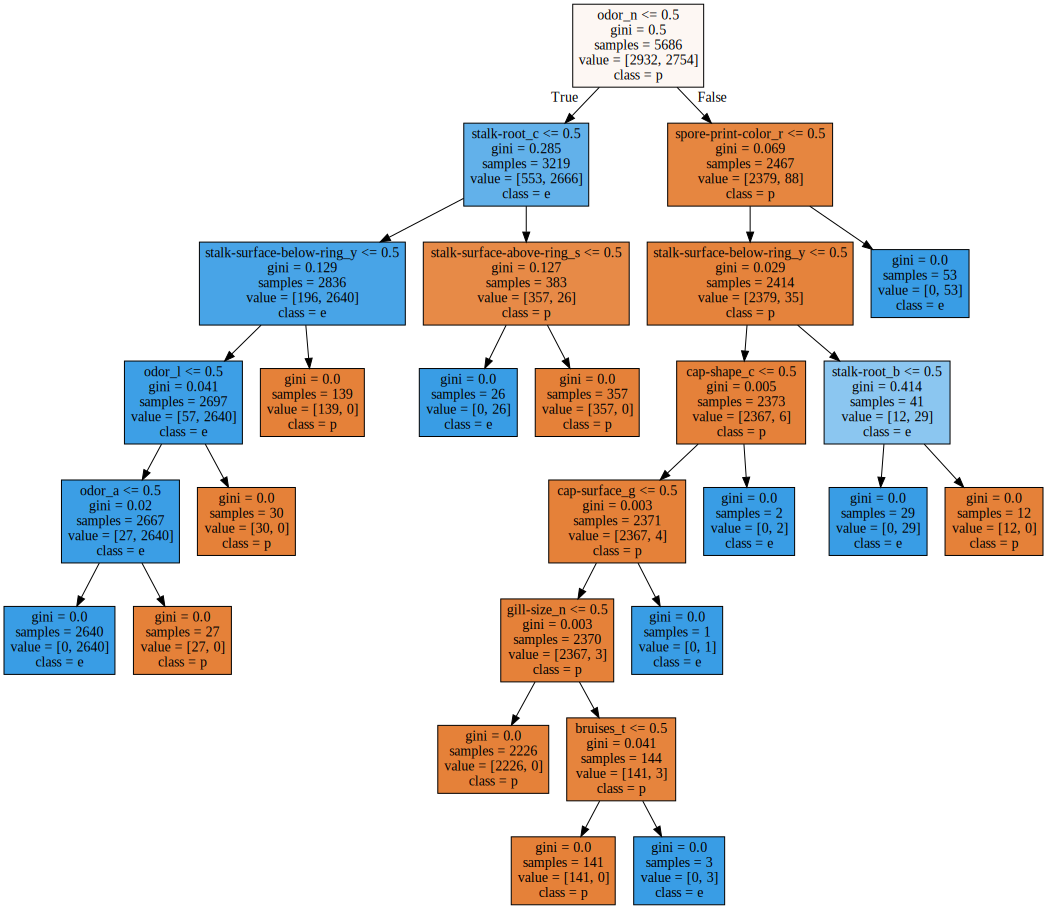

In [23]:
import graphviz

with open('tree.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [24]:
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

0

## 과대적합 제어

### Leaf Node 10개로 제한
- Leaf Node의 수를 10개로 조정한 모델 생성 >> 학습 >> 평가 >> 시각화

#### 모델 생성

In [25]:
treeModel2 = DecisionTreeClassifier(max_leaf_nodes=10)

#### 학습

In [26]:
treeModel2.fit(XTrain,yTrain)

DecisionTreeClassifier(max_leaf_nodes=10)

#### 평가

In [27]:
treeModel2.score(XTrain,yTrain)

0.9989447766443897

In [28]:
treeModel2.score(XTest,yTest)

0.9991796554552912

#### 시각화

In [29]:
from sklearn.tree import export_graphviz
export_graphviz(treeModel2, out_file='tree2.dot',
               class_names=['p','e'],
               feature_names=XOneHot.columns,
               impurity=True,
               filled=True)

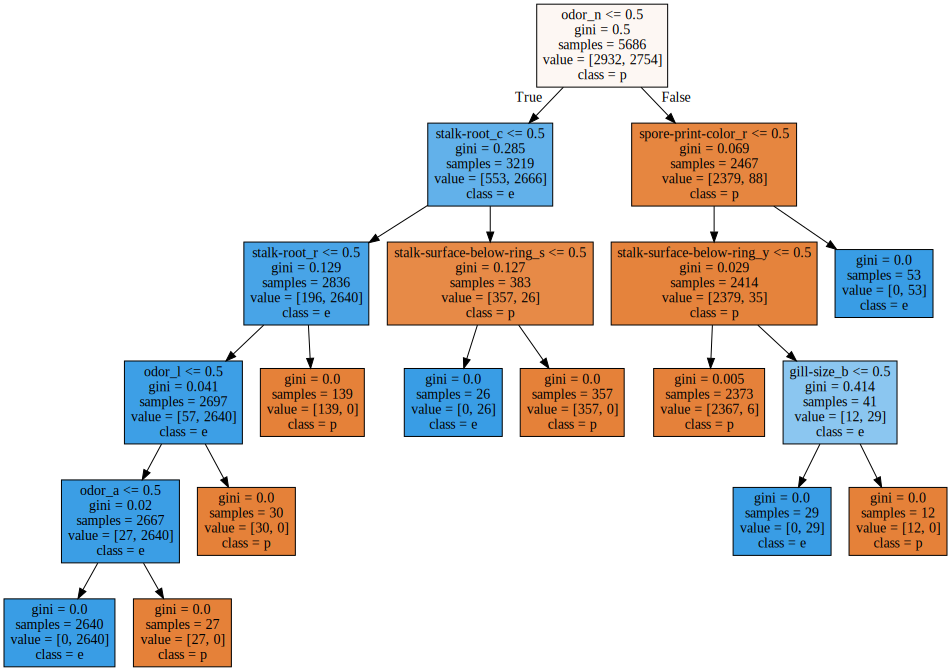

In [30]:
import graphviz

with open('tree2.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

### Leaf Node의 Sample 개수 제한
- Leaf Node가 최소 100개의 Sample을 갖도록

#### 모델 생성

In [31]:
treeModel3 = DecisionTreeClassifier(min_samples_leaf=100)

#### 학습

In [32]:
treeModel3.fit(XTrain,yTrain)

DecisionTreeClassifier(min_samples_leaf=100)

#### 평가

In [33]:
treeModel3.score(XTrain,yTrain)

0.9699261343651073

In [34]:
treeModel3.score(XTest,yTest)

0.9667760459392944

#### 시각화

In [35]:
from sklearn.tree import export_graphviz
export_graphviz(treeModel3, out_file='tree3.dot',
               class_names=['p','e'],
               feature_names=XOneHot.columns,
               impurity=True,
               filled=True)

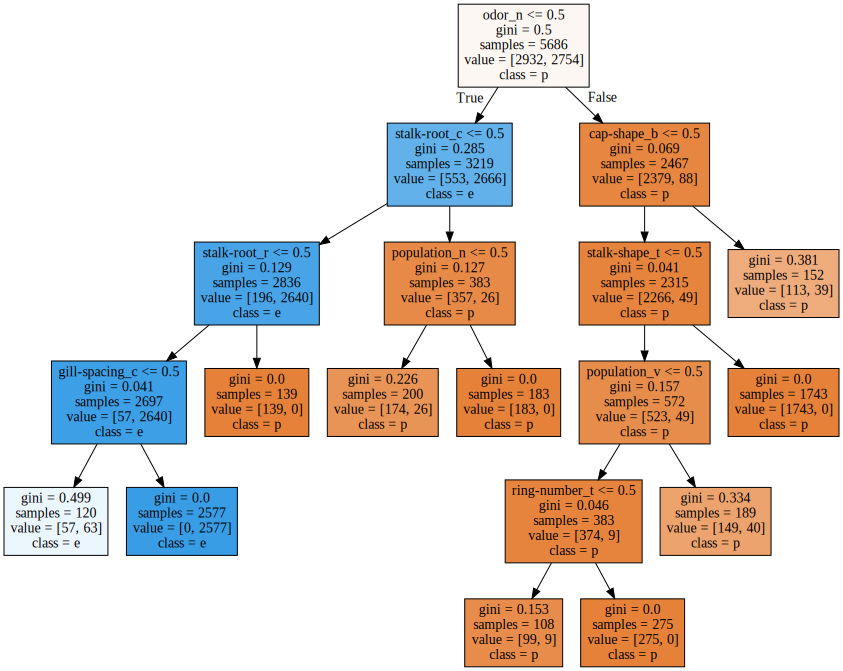

In [36]:
import graphviz

with open('tree3.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

### Node가 분리될 수 있는 Sample 수 제한
- Node의 Sample의 수가 100개 이하일 때에는 분리되지 않도록

#### 모델 생성

In [37]:
treeModel4 = DecisionTreeClassifier(min_samples_split=100)

#### 학습

In [38]:
treeModel4.fit(XTrain,yTrain)

DecisionTreeClassifier(min_samples_split=100)

#### 평가

In [39]:
treeModel4.score(XTrain,yTrain)

0.9978895532887795

In [40]:
treeModel4.score(XTest,yTest)

0.9983593109105825

#### 시각화

In [41]:
from sklearn.tree import export_graphviz
export_graphviz(treeModel4, out_file='tree4.dot',
               class_names=['p','e'],
               feature_names=XOneHot.columns,
               impurity=True,
               filled=True)

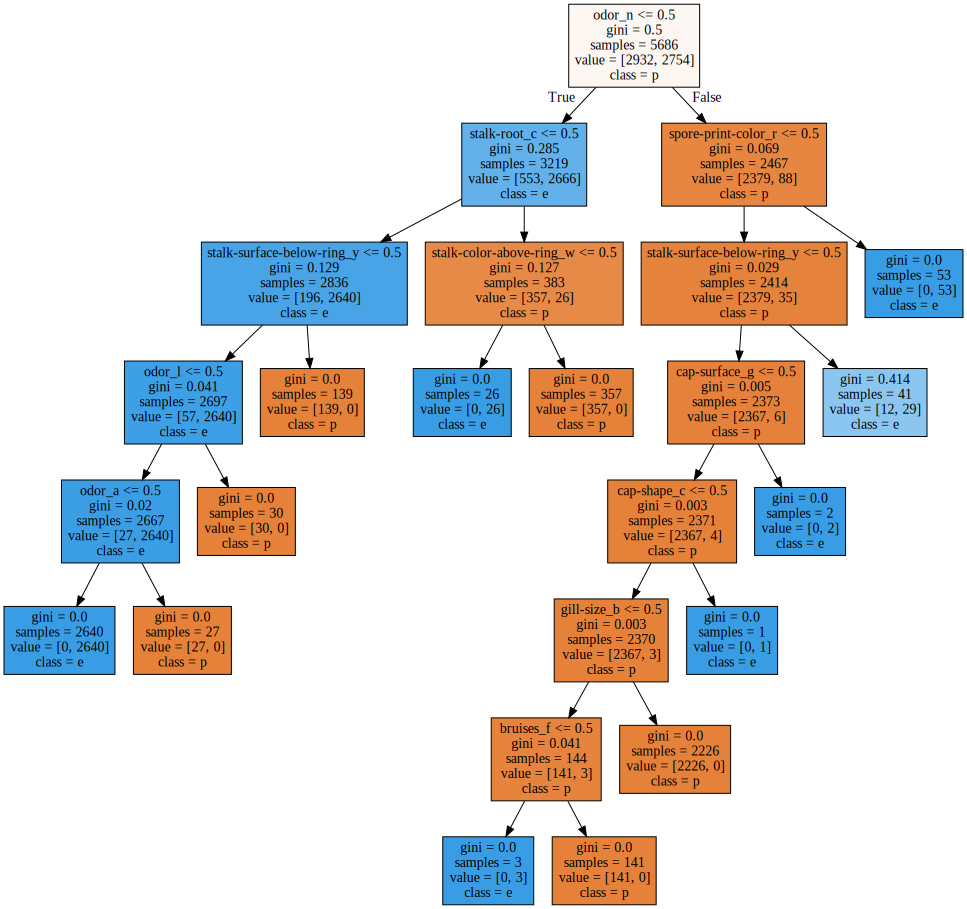

In [42]:
import graphviz

with open('tree4.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

## Cross Validation

### K-fold Cross Validation
1. 데이터를 K개의 Set으로 나눈다
2. 1st Set를 제외한 나머지 Set에 대해 학습 & 평가 진행
3. 제외할 Set를 바꿔가며 반복 수행

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
#사용할 모델, 문제, 정답, 데이터 분할 수
dfCrossValid = pd.DataFrame(cross_val_score(treeModel,XTrain,yTrain,cv = 5),columns=['score'],index=[1,2,3,4,5])
dfCrossValid

,score
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0


In [45]:
# 특성의 중요도
fi = treeModel.feature_importances_
dfFI = pd.DataFrame(fi,columns=['Importance'],index=XTrain.columns)
dfFI

,Importance
cap-shape_b,0.000000
cap-shape_c,0.001402
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [46]:
dfFI.sort_values(by='Importance', ascending = False).head(10)

,Importance
odor_n,0.617733
stalk-root_c,0.176965
stalk-surface-below-ring_y,0.103287
spore-print-color_r,0.035468
odor_l,0.020469
odor_a,0.018820
stalk-surface-above-ring_s,0.017066
stalk-root_b,0.005977
bruises_t,0.002069
cap-shape_c,0.001402


In [47]:
dfFI[dfFI['Importance'] != 0]

,Importance
cap-shape_c,0.001402
cap-surface_g,0.000702
bruises_t,0.002069
odor_a,0.018820
odor_l,0.020469
odor_n,0.617733
gill-size_n,0.000041
stalk-root_b,0.005977
stalk-root_c,0.176965
stalk-surface-above-ring_s,0.017066
